In [1]:
from photometry_tools import Image, Atlas
from astropy.io import fits
from astropy.coordinates import SkyCoord
%load_ext autoreload
%autoreload 2

Could not import regions, which is required for some of the functionalities of this module.


In [2]:
# read the Image.
hdul = fits.open('/Users/luoyilin/Astro/NGC1068/NGC1068_images/NGC1068_SDSS_r.fits')
data = hdul[0].data
header = hdul[0].header
direct_coord = SkyCoord('02h42m40.7091669408s -00d00m47.859690204s')
ra, dec = direct_coord.ra, direct_coord.dec
img = Image(data=data, header=header,target_coordinate=(ra.value, dec.value))

In [3]:
# roughly estimate the background properties.
img.background_properties(mask_type='quick')

(1.1184108922169642e-06, 1.1153339653845648e-06, 7.871416881157292e-08)

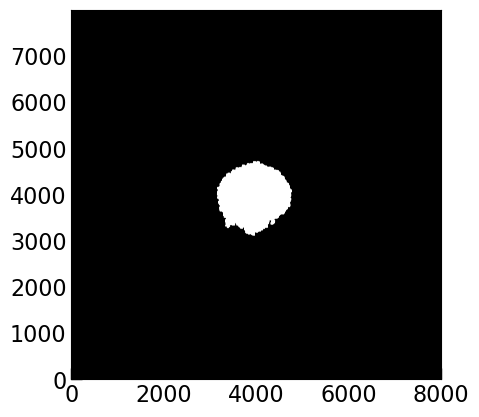

In [7]:
# build up the target galaxy mask.
img.mask_galaxy(plot=True)

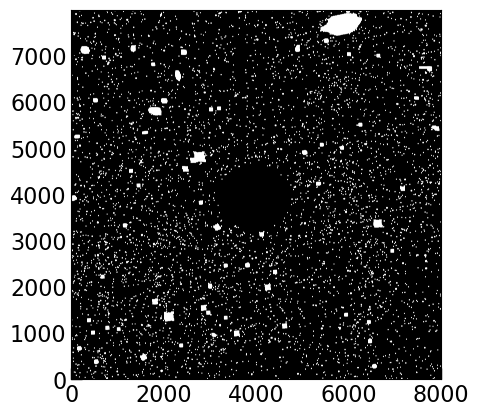

In [15]:
# build up the stars mask.
img.mask_stars(plot=True)

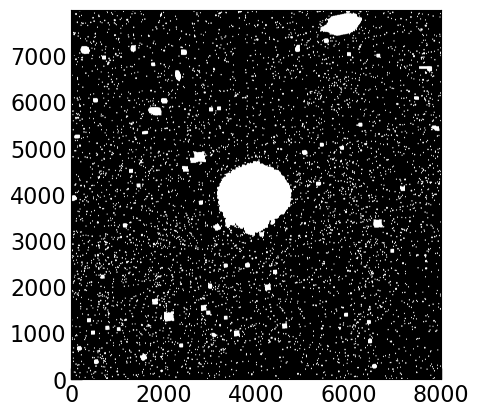

In [16]:
# build up the mask for estimating the backgroud.
img.mask_background(plot=True)

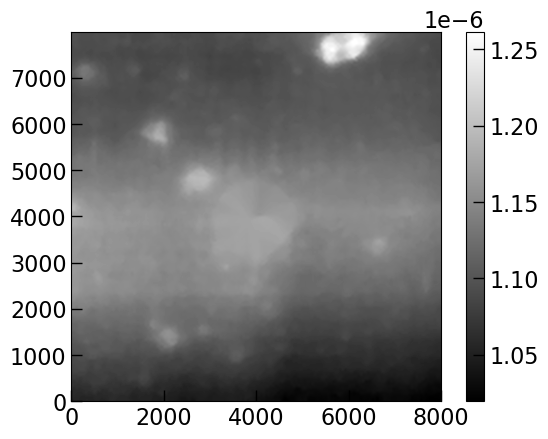

In [17]:
# get the background model.
img.background_model(plot=True)

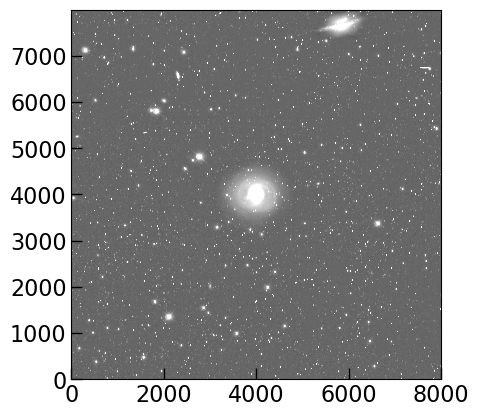

In [29]:
# background subtraction.
img.background_subtract(plot=True, percent=99.)

Ra,Dec,Gmag
float64,float64,float64
40.65418004634294,0.021559274172367703,19.146595
40.68100377475673,0.05136601398406792,16.560606
40.622692726782276,-0.08917856805672365,17.533682
40.69167151877717,-0.02287286428779007,10.686306
40.66031640725169,-0.028864475397816728,16.677208
40.598025604108145,-0.021607966667547465,17.276964
40.68538546141551,-0.1100985163852549,12.148796
...,...,...
40.68694187008124,0.01560512051940742,16.219891


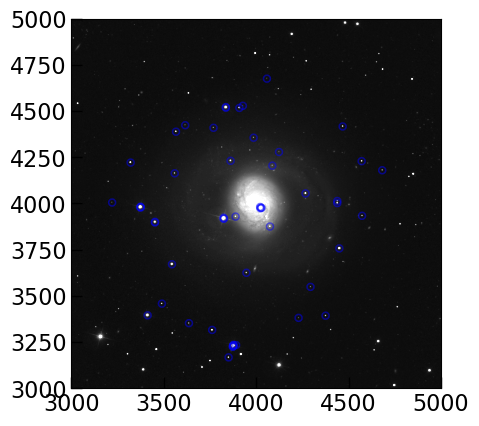

In [23]:
# detect the point foreground stars.
img.get_sources_foreground(plot=True, percent=99.9, xlim=(3000,5000), ylim=(3000,5000))

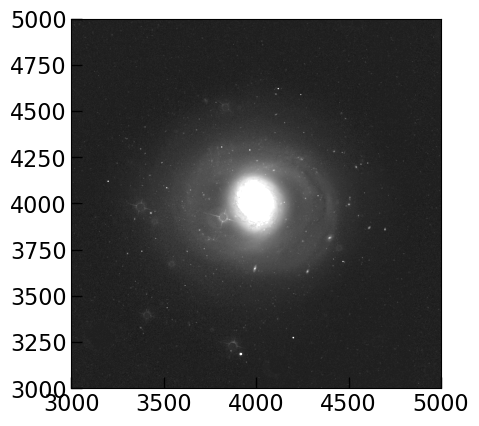

In [24]:
# clean all the foreground stars.
img.remove_sources_simple(plot=True,percent=99.9, xlim=(3000,5000), ylim=(3000,5000))

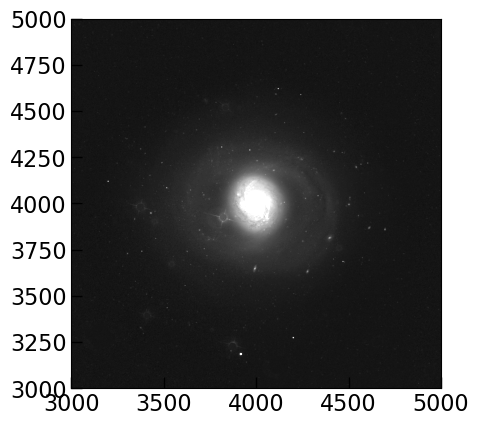

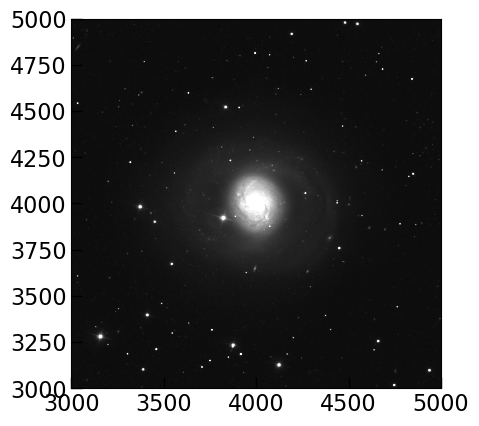

In [26]:
# comparsion.(local)
from matplotlib import pyplot as plt
from astropy.visualization import simple_norm
norm = simple_norm(img._image_cleaned, stretch='asinh', percent=99.95)
plt.imshow(img._image_cleaned, origin='lower', cmap='gray', norm=norm)
plt.xlim(3000,5000)
plt.ylim(3000,5000)
plt.show()
norm = simple_norm(img._data_subbkg, stretch='asinh', percent=99.9)
plt.imshow(img._data_subbkg, origin='lower', cmap='gray', norm=norm)
plt.xlim(3000,5000)
plt.ylim(3000,5000)
plt.show()

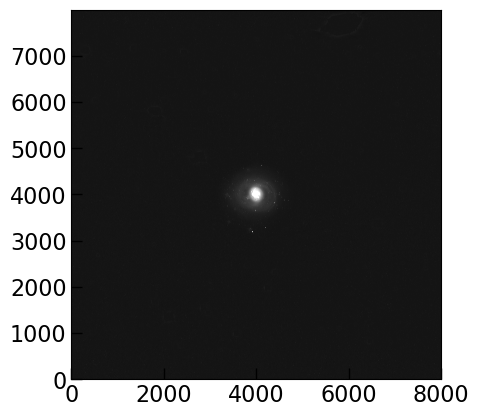

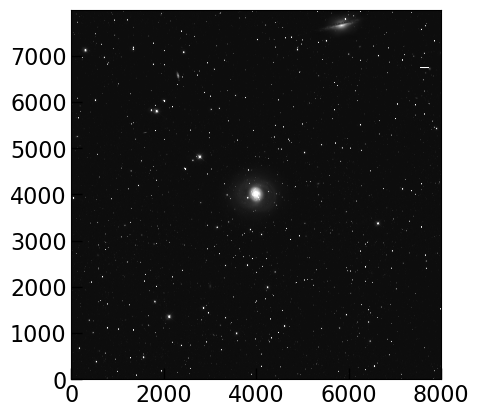

In [27]:
# comparsion.(whole image)
norm = simple_norm(img._image_cleaned, stretch='asinh', percent=99.95)
plt.imshow(img._image_cleaned, origin='lower', cmap='gray', norm=norm)
plt.show()
norm = simple_norm(img._data_subbkg, stretch='asinh', percent=99.9)
plt.imshow(img._data_subbkg, origin='lower', cmap='gray', norm=norm)
plt.show()